In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 162 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 0.5103 - loss: 0.7602 - val_accuracy: 0.5500 - val_loss: 0.6899
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3989 - loss: 0.7256 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5146 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4762 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4607 - loss: 0.6963 - val_accuracy: 0.5250 - val_loss: 0.6928
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4503 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6929
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5230 - loss: 0.6936 - val_accuracy: 0.5750 - val_loss: 0.6925
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms

Validation Loss: 0.6943070888519287
Validation Accuracy: 0.5


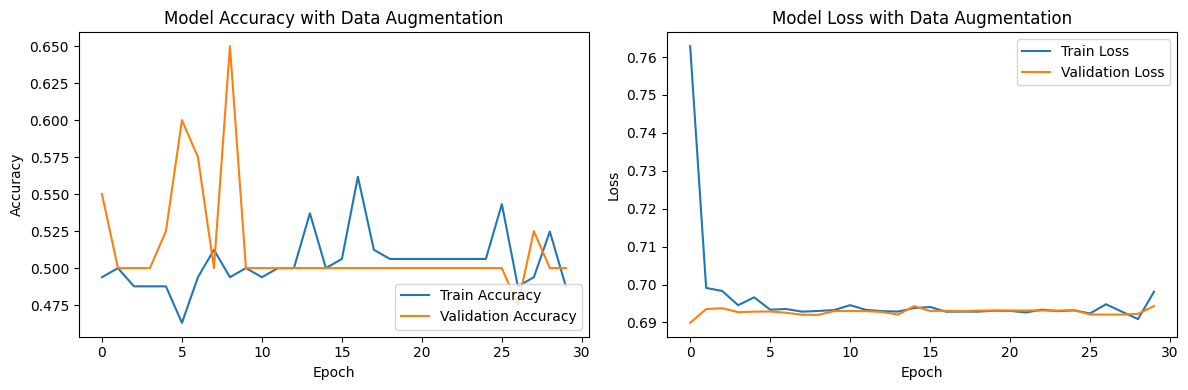

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import random







# Step 1: Data Preparation
image_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 32

# Paths to your data directories
data_directory = '/content/drive/MyDrive/processed'  # Ensure this directory has 'positive' and 'negative' subdirectories

# Using ImageDataGenerator to load images from directories and augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    rotation_range=20,      # Randomly rotate images by 0-20 degrees
    width_shift_range=0.2,  # Randomly translate images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly translate images vertically by up to 20% of the height
    shear_range=0.15,       # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,        # Randomly zoom into images by up to 15%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Strategy used for filling in newly created pixels
)

# For validation data, we typically do not apply augmentation, only rescaling
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Must be the same as in train_datagen
)

# Creating the training generator with augmentation
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True  # Shuffle the data to ensure random batches
)

# Creating the validation generator without augmentation
validation_generator = validation_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Shuffling is not necessary for validation
)

# Step 2: CNN Model Creation
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, followed by ReLU activation and max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers to increase complexity
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for the dense layer
model.add(Flatten())

# Fully connected layer with dropout to avoid overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Step 3: Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
history = model.fit(
    train_generator,
    epochs=30,  # Increased epochs to allow model to learn better with augmented data
    validation_data=validation_generator
)

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Step 6: Model Save (optional)
model.save('hcc_ct_classifier_augmented.h5')

# Optional: Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 


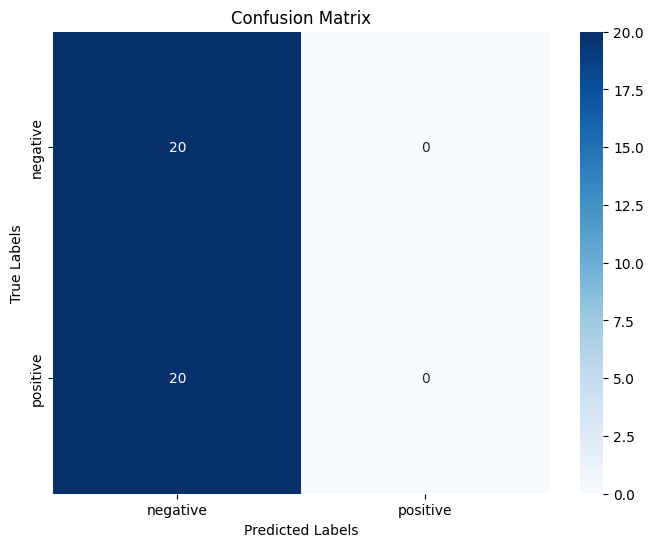

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67        20
    positive       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Predict on the validation data
validation_generator.reset()  # Ensure the generator starts from the beginning
predictions = model.predict(validation_generator)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)  # Convert probabilities to binary (0 or 1)

# Step 2: Get true labels
true_classes = validation_generator.classes  # True labels from the generator
class_labels = list(validation_generator.class_indices.keys())  # ['negative', 'positive']

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optional: Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 202 files belonging to 2 classes.
Using 162 files for training.


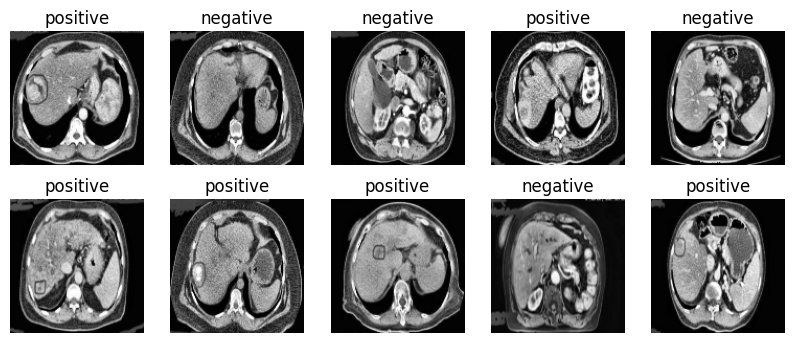

In [ ]:
train_data_dir = "/content/drive/MyDrive/processed"


train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=batch_size,
                                                         image_size=image_size,
                                                         subset='training',
                                                         validation_split=0.2,
                                                         seed=42)

class_names = train_data.class_names
class_names

# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [ ]:
model_n.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [ ]:
# Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Add the test data directory
test_data_directory = '/content/drive/MyDrive/processed'  # Path to your test data directory

# Test Data Preparation (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

# Step 5: Model Evaluation on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 202 images belonging to 2 classes.
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6250 - loss: 0.6663

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5988 - loss: 0.6655
Test Loss: 0.670880138874054
Test Accuracy: 0.5594059228897095


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
The prediction is: Negative (No Tumor)


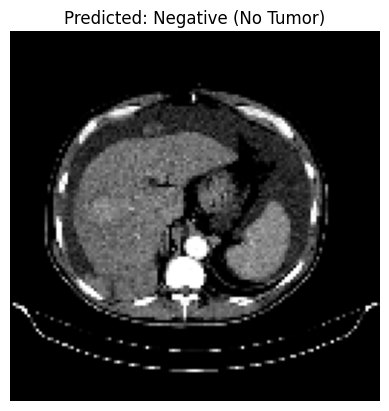

In [ ]:
# Step 7: Test and Predict New Image
# Load the trained model
model = load_model('hcc_ct_classifier_augmented.h5')

# Path to the new image you want to test
image_path = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/New/test images.jpeg'  # Replace with the actual image path

# Load and preprocess the new image
img = load_img(image_path, target_size=image_size)  # Resize to 128x128 as the model expects
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 3)
img_array /= 255.0  # Scale pixel values to [0, 1] as during training

# Predict using the model
prediction = model.predict(img_array)

# Output the prediction result
if prediction[0] > 0.5:
    print(f"The prediction is: Positive (Tumor)")
else:
    print(f"The prediction is: Negative (No Tumor)")

# Display the new image with prediction result
plt.imshow(img)
if prediction[0] > 0.5:
    plt.title("Predicted: Positive (Tumor)")
else:
    plt.title("Predicted: Negative (No Tumor)")
plt.axis('off')
plt.show()


**Automated Virtual Tumor Classifier**

In [ ]:

# Load the trained model
model = load_model('hcc_ct_classifier_augmented.h5')

# Directory containing the images you want to test
test_images_directory = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/Test images'  # Replace with the directory containing test images

# Function to load images from the directory
def load_images_from_directory(directory, target_size=(128, 128)):
    image_list = []
    file_names = []

    for file_name in os.listdir(directory):
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
            img_path = os.path.join(directory, file_name)
            img = load_img(img_path, target_size=target_size)  # Resize image to 128x128
            img_array = img_to_array(img)  # Convert image to array
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 3)
            img_array /= 255.0  # Normalize pixel values to [0, 1]
            image_list.append(img_array)
            file_names.append(file_name)

    return np.vstack(image_list), file_names

# Load images from the directory
images, file_names = load_images_from_directory(test_images_directory)

# Predict the labels for all loaded images
predictions = model.predict(images)

# Display predictions and images
for i, prediction in enumerate(predictions):
    img_path = os.path.join(test_images_directory, file_names[i])
    img = load_img(img_path)

    # Display the prediction result
    if prediction > 0.25:
        label = "Positive (Tumor)"
    else:
        label = "Negative (No Tumor)"

    print(f"The prediction for {file_names[i]} is: {label}")

    # Display the image with its prediction
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Data Augmentation**

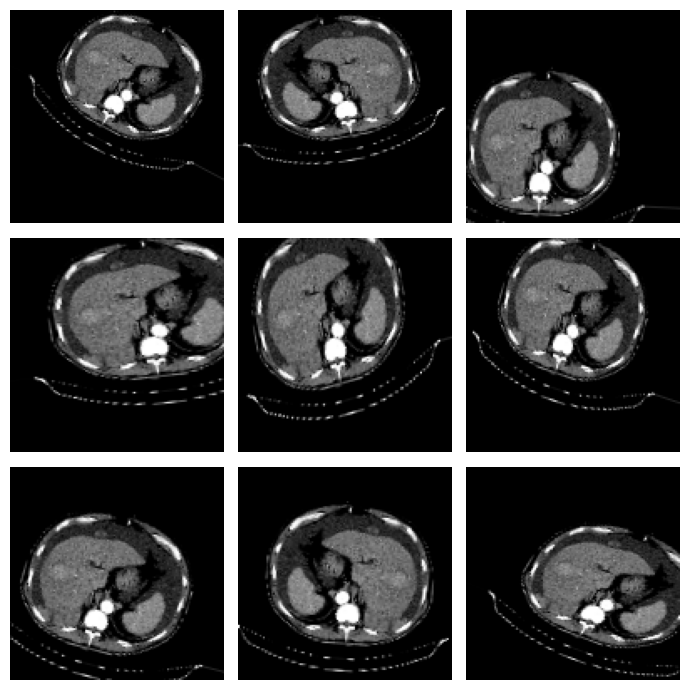

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Load a single image
img_path = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/New/test images.jpeg'  # Update with your image path
img = load_img(img_path, target_size=(128, 128))  # Resize image to match model input size (128x128 in this case)

# Convert image to a numpy array
img_array = img_to_array(img)

# Expand dimensions to create a batch of one image
img_array = np.expand_dims(img_array, axis=0)

# Create an ImageDataGenerator instance with augmentations
datagen = ImageDataGenerator(
    rotation_range=30,        # Random rotation up to 30 degrees
    width_shift_range=0.2,    # Random horizontal shift by up to 20%
    height_shift_range=0.2,   # Random vertical shift by up to 20%
    shear_range=0.15,         # Shear transformation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Horizontal flip
    fill_mode='nearest'       # Fill any gaps with the nearest pixel
)

# Generate augmented images and visualize them
augmented_images = datagen.flow(img_array, batch_size=1)  # Flow method to generate augmented images

# Plot a few augmented versions of the image
plt.figure(figsize=(7, 7))

for i in range(9):  # Show 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_img = batch[0].astype('uint8')  # Convert to uint8 to display as an image
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Gabor Filter**

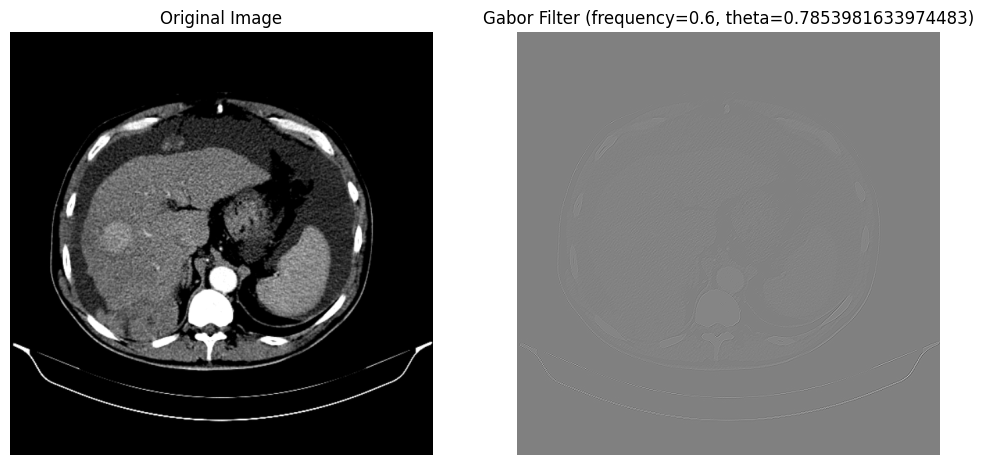

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage import color, io  # Add io to load the image

# Load your own image
image_path = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/New/test images.jpeg'  # Replace with your image path
image = io.imread(image_path)

# If the image is not already in grayscale, convert it
if len(image.shape) == 3:  # Check if the image has multiple channels (i.e., is RGB)
    image = color.rgb2gray(image)  # Convert RGB to grayscale

# Parameters for the Gabor filter
frequency = 0.6  # Frequency of the sinusoidal wave
theta = np.pi / 4  # Orientation (in radians)

# Apply Gabor filter
filtered_image, gabor_kernel = gabor(image, frequency=frequency, theta=theta)

# Display original and filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Gabor Filter (frequency={frequency}, theta={theta})')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


**Image Segmentation - Basic Approach: Thresholding and Morphological Operations**

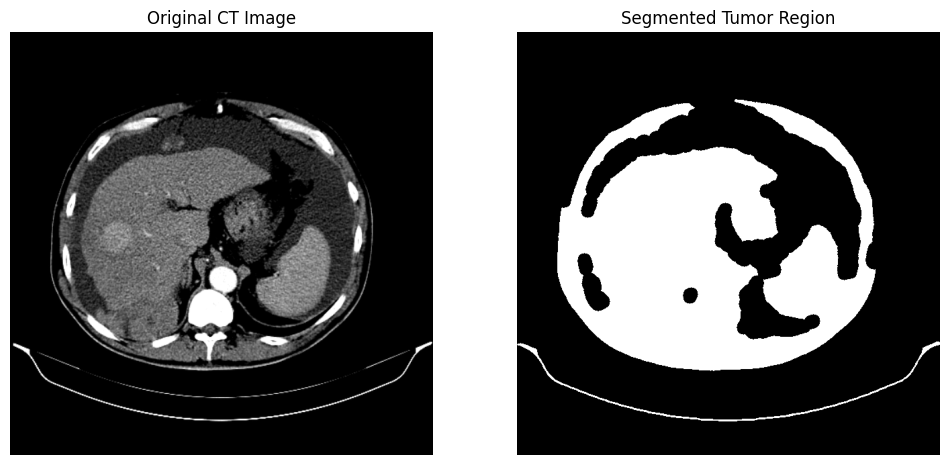

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import threshold_otsu

# Load the image (JPG or PNG)
image_path = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/New/test images.jpeg'  # Replace with your image path
image = io.imread(image_path)

# If the image is RGB, convert it to grayscale
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Normalize pixel values to [0, 1]
image = image.astype(np.float32)
image /= np.max(image)

# Apply Otsu's thresholding to separate tumor region from the background
threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

# Use morphological operations to remove small noise and close gaps
binary_image = morphology.remove_small_objects(binary_image, min_size=500)  # Remove small regions
binary_image = morphology.binary_closing(binary_image, morphology.disk(10))  # Fill small holes

# Display the original and segmented image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original CT Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Tumor Region")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()


**Image Contouring**

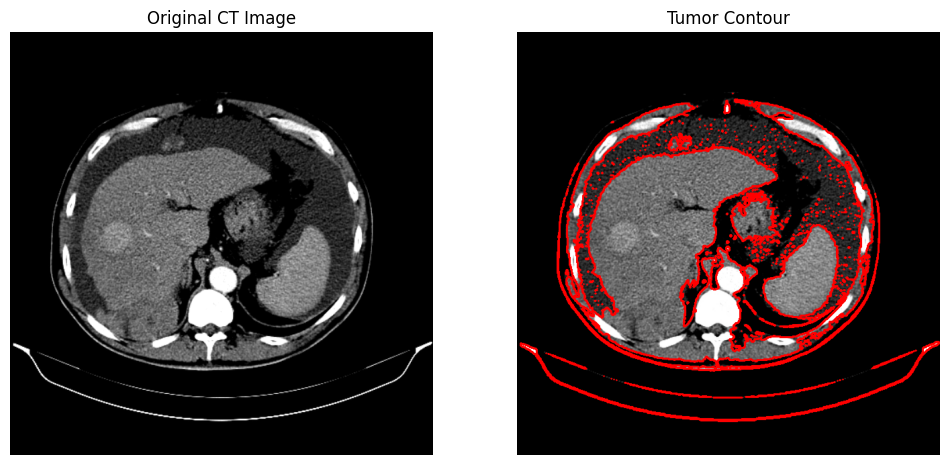

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu

# Load the image (JPG or PNG)
image_path = '/content/drive/MyDrive/HCC - Research/HCC CNN Model/New/test images.jpeg'  # Replace with your image path
image = io.imread(image_path)

# Convert the image to grayscale if it is in RGB
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Normalize pixel values to [0, 1]
image = image.astype(np.float32)
image /= np.max(image)

# Apply Otsu's thresholding to create a binary image
threshold_value = threshold_otsu(image)
binary_image = (image > threshold_value).astype(np.uint8)  # Convert to binary (0 and 1)

# Convert the binary image to a format OpenCV can work with (8-bit)
binary_image = (binary_image * 255).astype(np.uint8)

# Find contours using OpenCV
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert the grayscale image to RGB for visualization (contour overlay)
contoured_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2RGB)

# Draw the contours on the original grayscale image
cv2.drawContours(contoured_image, contours, -1, (255, 0, 0), 2)  # Red color for contours

# Display the original and contoured image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original CT Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Tumor Contour")
plt.imshow(contoured_image)
plt.axis('off')

plt.show()


**Transfer Learning**

Found 128 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.5000 - loss: 0.7975 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.5396 - loss: 0.7610 - val_accuracy: 0.5312 - val_loss: 0.6774
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.5531 - loss: 0.7151 - val_accuracy: 0.5938 - val_loss: 0.6708
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.5615 - loss: 0.7033 - val_accuracy: 0.5625 - val_loss: 0.6699
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.4719 - loss: 0.7244 - val_accuracy: 0.5938 - val_loss: 0.6720
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.5552 - loss: 0.6935 - val_accuracy: 0.6250 - val_loss: 0.6740
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6042 - loss: 0.6683 - val_accuracy: 0.5938 - val_loss: 0.6754
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5635 - loss: 0.7678 - val_accuracy: 0.5938 - val_loss: 0.6755
Epoch

Test Loss: 0.7246605157852173
Test Accuracy: 0.5


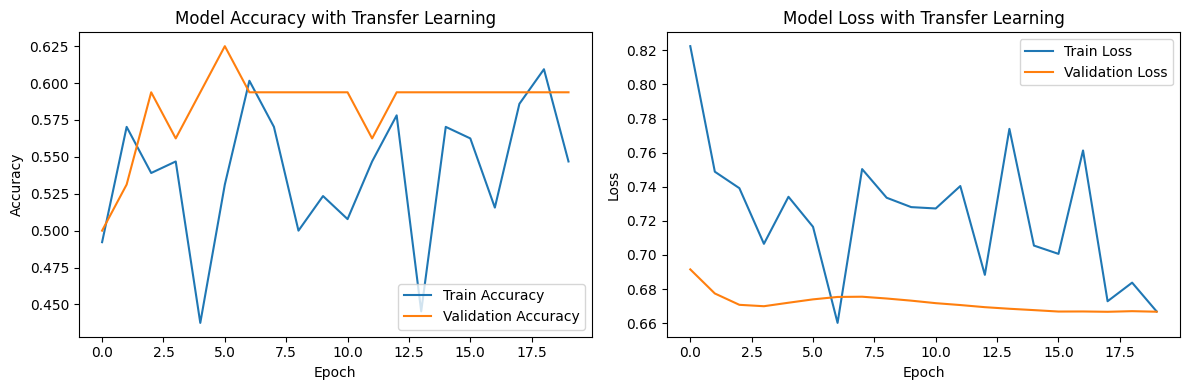

In [ ]:
# Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import the pre-trained VGG16 model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Data Preparation
image_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 32

# Paths to your data directories
data_directory = '/content/drive/MyDrive/HCC CNN Model/Train Test Images/Training'  # Training/Validation data directory
test_data_directory = '/content/drive/MyDrive/HCC CNN Model/Train Test Images/Testing'  # Test data directory

# Using ImageDataGenerator to load and augment training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# For test data, only rescaling is applied (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the training generator with augmentation
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Creating the validation generator without augmentation
validation_generator = validation_datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Creating the test generator without augmentation
test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Step 2: Load Pre-trained VGG16 Model and Add Custom Layers
# Load VGG16 model (without the top classification layers), and keep the pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers (so they are not trained)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replace Flatten with GAP for transfer learning
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 3: Model Compilation
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training with Transfer Learning
history = model.fit(
    train_generator,
    epochs=30,  # You can adjust the number of epochs based on your needs
    validation_data=validation_generator
)

# Step 5: Model Evaluation
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Step 5 (continued): Model Evaluation on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 6: Model Save (optional)
model.save('hcc_ct_classifier_transfer_learning.h5')

# Optional: Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Train and Test Data Only**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.5547 - loss: 0.6907 - val_accuracy: 0.5122 - val_loss: 0.6924
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4720 - loss: 0.6972 - val_accuracy: 0.5366 - val_loss: 0.6836
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5693 - loss: 0.6820 - val_accuracy: 0.5854 - val_loss: 0.6620
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6489 - loss: 0.6620 - val_accuracy: 0.6341 - val_loss: 0.6323
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6919 - loss: 0.6129 - val_accuracy: 0.6585 - val_loss: 0.5900
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7464 - loss: 0.5493 - val_accuracy: 0.7073 - val_loss: 0.5757
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8170 - loss: 0.4734 - val_accuracy: 0.8049 - val_loss: 0.3735
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9041 - loss: 0.2459 - val_accuracy: 0.8293 - 

Test Loss: 0.3655152916908264
Test Accuracy: 0.9512194991111755


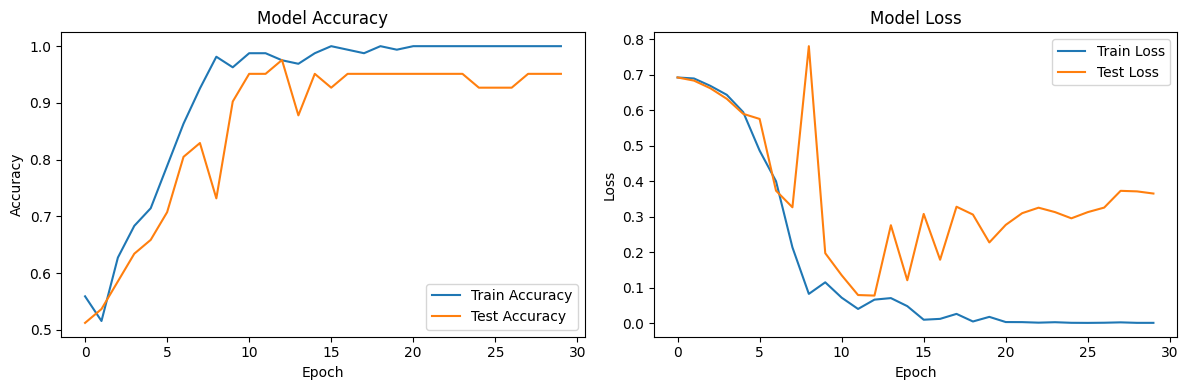

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Set random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Step 1: Data Preparation
image_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 16

# Paths to your data directories
data_directory = '/content/drive/MyDrive/processed'  # Ensure this directory has 'positive' and 'negative' subdirectories

# Load all image paths and their corresponding labels
def load_data(data_directory):
    images = []
    labels = []
    for label, subdir in enumerate(['negative', 'positive']):
        subdir_path = os.path.join(data_directory, subdir)
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            img = load_img(file_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize images
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_data(data_directory)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=seed, stratify=labels
)

# Step 2: CNN Model Creation
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, followed by ReLU activation and max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers to increase complexity
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for the dense layer
model.add(Flatten())

# Fully connected layer with dropout to avoid overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Step 3: Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
history = model.fit(
    X_train, y_train,
    epochs=30,  # Increased epochs to allow model to learn better
    batch_size=batch_size,
    validation_data=(X_test, y_test)  # Using testing data for validation
)

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Step 6: Model Save (optional)
model.save('hcc_ct_classifier_no_validation.h5')

# Optional: Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Train and Test Data with Data Augmentation**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.4531 - loss: 0.8878 - val_accuracy: 0.4878 - val_loss: 0.7001
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5105 - loss: 0.6927 - val_accuracy: 0.5122 - val_loss: 0.6925
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5088 - loss: 0.6946 - val_accuracy: 0.5122 - val_loss: 0.6937
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5085 - loss: 0.6966 - val_accuracy: 0.5122 - val_loss: 0.6929
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4694 - loss: 0.6937 - val_accuracy: 0.4878 - val_loss: 0.6969
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5207 - loss: 0.6884 - val_accuracy: 0.4878 - val_loss: 0.6973
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4621 - loss: 0.6980 - val_accuracy: 0.4878 - val_loss: 0.6963
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4468 - loss: 0.6981 - val_accuracy: 0.4878 - val_loss: 0.6941
Epoch 9/30

Test Loss: 0.6911579966545105
Test Accuracy: 0.5365853905677795


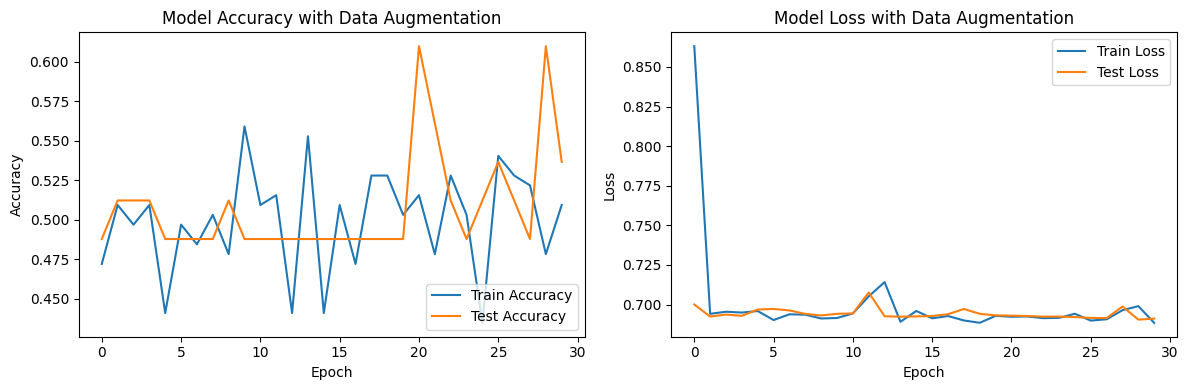

Number of training samples: 161
Number of testing samples: 41


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Set random seed for reproducibility
seed = 41
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Step 1: Data Preparation
image_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 32

# Paths to your data directories
data_directory = '/content/drive/MyDrive/processed'  # Ensure this directory has 'positive' and 'negative' subdirectories

# Load all image paths and their corresponding labels
def load_data(data_directory):
    images = []
    labels = []
    for label, subdir in enumerate(['negative', 'positive']):
        subdir_path = os.path.join(data_directory, subdir)
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            img = load_img(file_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize images
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_data(data_directory)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=seed, stratify=labels
)

# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images by 0-20 degrees
    width_shift_range=0.2,  # Randomly translate images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly translate images vertically by up to 20% of the height
    shear_range=0.15,       # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.15,        # Randomly zoom into images by up to 15%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Strategy used for filling in newly created pixels
)

# No augmentation for the testing dataset
test_datagen = ImageDataGenerator()

# Generate augmented training data
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=batch_size
)

# Generate testing data without augmentation
test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=batch_size
)

# Step 2: CNN Model Creation
model_n = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, followed by ReLU activation and max pooling
model_n.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_n.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers to increase complexity
model_n.add(Conv2D(64, (3, 3), activation='relu'))
model_n.add(MaxPooling2D(pool_size=(2, 2)))

model_n.add(Conv2D(128, (3, 3), activation='relu'))
model_n.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for the dense layer
model_n.add(Flatten())

# Fully connected layer with dropout to avoid overfitting
model_n.add(Dense(128, activation='relu'))
model_n.add(Dropout(0.5))

# Output layer for binary classification
model_n.add(Dense(1, activation='sigmoid'))

# Step 3: Model Compilation
model_n.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
history = model_n.fit(
    train_generator,
    epochs=30,  # Increased epochs to allow model to learn better
    validation_data=test_generator
)

# Step 5: Model Evaluation
loss, accuracy = model_n.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Step 6: Model Save (optional)
model_n.save('hcc_ct_classifier_with_augmentation.h5')

# Optional: Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss with Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



# Print the count of training and testing sets
print(f"Number of training samples: {len(y_train)}")
print(f"Number of testing samples: {len(y_test)}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[17  4]
 [17  3]]


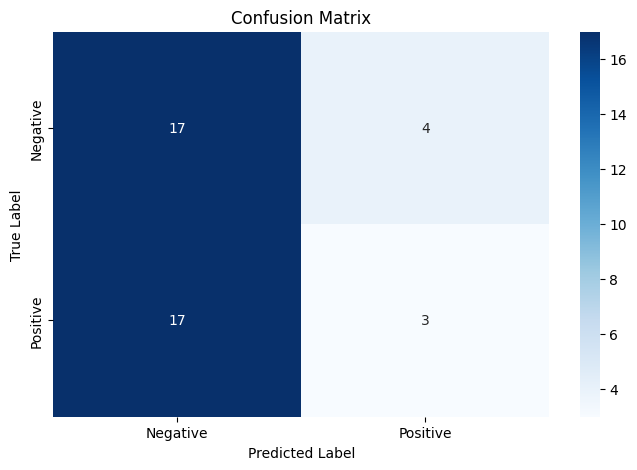


Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.81      0.62        21
    Positive       0.43      0.15      0.22        20

    accuracy                           0.49        41
   macro avg       0.46      0.48      0.42        41
weighted avg       0.47      0.49      0.43        41

Specificity: 0.81


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 5.1: Predict the class labels for the test set
y_pred_probs = model_n.predict(test_generator)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Step 5.2: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5.3: Classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

# Step 5.4: Specificity calculation
tn, fp, fn, tp = cm.ravel()  # Extract true negatives, false positives, false negatives, true positives
specificity = tn / (tn + fp)  # Specificity formula
print(f"Specificity: {specificity:.2f}")


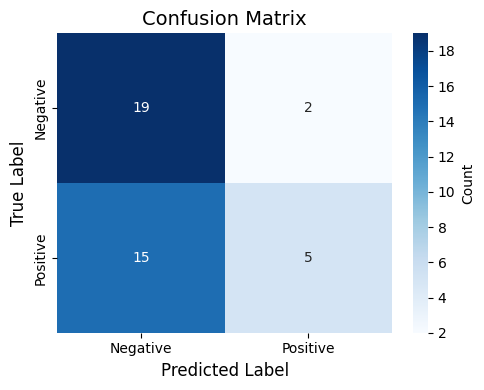

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
conf_matrix = np.array([[19, 2],
                        [15, 5]])

# Labels for the axes
labels = ['Negative', 'Positive']

# Create the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})

# Add labels, title, and formatting
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()
